In [1]:
  from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.mode.chained_assignment = None
student_data=pd.read_csv('/content/drive/MyDrive/datsets/StudentsPerformance.csv')

In [3]:
student_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
student_data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [5]:
student_data = student_data.rename(columns={'race/ethnicity': 'ethnicity', 'parental level of education': 'parent_education','test preparation course': 'test_prep','math score': 'math_score','reading score':'read_score','writing score':'write_score'})

In [6]:
student_data

,gender,ethnicity,parent_education,lunch,test_prep,math_score,read_score,write_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [7]:
student_data['parent_education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [8]:
def education_correction(degree):
  if degree=="bachelor's degree":
    degree='bachelors'
  elif degree=="some college":
    degree='college level'
  elif degree=="master's degree":
    degree='masters'
  elif degree=="associate's degree":
    degree='associate'
  elif degree=="high school" or degree=="some high school":
    degree='GED'
  return degree

student_data['parent_education']=student_data['parent_education'].apply(education_correction)

student_data.head()

,gender,ethnicity,parent_education,lunch,test_prep,math_score,read_score,write_score
0,female,group B,bachelors,standard,none,72,72,74
1,female,group C,college level,standard,completed,69,90,88
2,female,group B,masters,standard,none,90,95,93
3,male,group A,associate,free/reduced,none,47,57,44
4,male,group C,college level,standard,none,76,78,75


In [9]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            1000 non-null   object
 1   ethnicity         1000 non-null   object
 2   parent_education  1000 non-null   object
 3   lunch             1000 non-null   object
 4   test_prep         1000 non-null   object
 5   math_score        1000 non-null   int64 
 6   read_score        1000 non-null   int64 
 7   write_score       1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
student_data['total_marks']=student_data['math_score']+student_data['read_score']+student_data['write_score']
student_data.head()

,gender,ethnicity,parent_education,lunch,test_prep,math_score,read_score,write_score,total_marks
0,female,group B,bachelors,standard,none,72,72,74,218
1,female,group C,college level,standard,completed,69,90,88,247
2,female,group B,masters,standard,none,90,95,93,278
3,male,group A,associate,free/reduced,none,47,57,44,148
4,male,group C,college level,standard,none,76,78,75,229


In [11]:
student_data['percentage']=student_data['total_marks'].apply(lambda x: round((x/300)*100,2))

In [12]:
student_data

,gender,ethnicity,parent_education,lunch,test_prep,math_score,read_score,write_score,total_marks,percentage
0,female,group B,bachelors,standard,none,72,72,74,218,72.67
1,female,group C,college level,standard,completed,69,90,88,247,82.33
2,female,group B,masters,standard,none,90,95,93,278,92.67
3,male,group A,associate,free/reduced,none,47,57,44,148,49.33
4,male,group C,college level,standard,none,76,78,75,229,76.33
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,masters,standard,completed,88,99,95,282,94.00
996,male,group C,GED,free/reduced,none,62,55,55,172,57.33
997,female,group C,GED,free/reduced,completed,59,71,65,195,65.00
998,female,group D,college level,standard,completed,68,78,77,223,74.33


In [13]:
PE_Conditions = [
    (student_data['percentage'] < 65.00),
    (student_data['percentage']>=65.00) & (student_data['percentage']< 85.00),
    (student_data['percentage'] >= 85.00)
]
PE_Categories = ['Fail', 'Pass', 'Distinction']
student_data['Status'] = np.select(PE_Conditions, PE_Categories)
student_data.head()

,gender,ethnicity,parent_education,lunch,test_prep,math_score,read_score,write_score,total_marks,percentage,Status
0,female,group B,bachelors,standard,none,72,72,74,218,72.67,Pass
1,female,group C,college level,standard,completed,69,90,88,247,82.33,Pass
2,female,group B,masters,standard,none,90,95,93,278,92.67,Distinction
3,male,group A,associate,free/reduced,none,47,57,44,148,49.33,Fail
4,male,group C,college level,standard,none,76,78,75,229,76.33,Pass


In [14]:
student_data['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [15]:
student_data['lunch']=student_data['lunch'].str.replace('free/reduced','free')
student_data.head()

,gender,ethnicity,parent_education,lunch,test_prep,math_score,read_score,write_score,total_marks,percentage,Status
0,female,group B,bachelors,standard,none,72,72,74,218,72.67,Pass
1,female,group C,college level,standard,completed,69,90,88,247,82.33,Pass
2,female,group B,masters,standard,none,90,95,93,278,92.67,Distinction
3,male,group A,associate,free,none,47,57,44,148,49.33,Fail
4,male,group C,college level,standard,none,76,78,75,229,76.33,Pass


In [16]:
student_data['ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [17]:
student_data['test_prep'].unique()

array(['none', 'completed'], dtype=object)

<Axes: xlabel='gender', ylabel='count'>

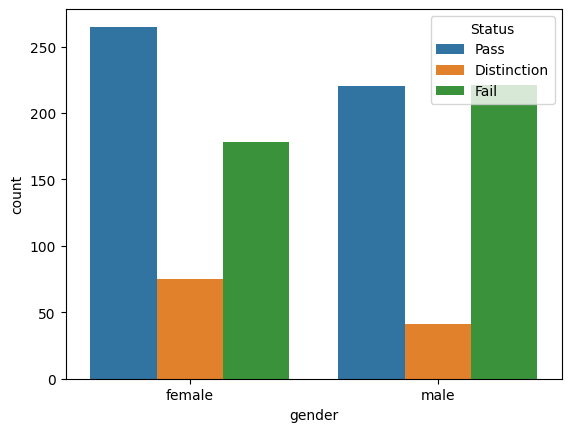

In [18]:
import seaborn as sns

sns.countplot(x='gender',data=student_data,hue='Status')

<Axes: xlabel='parent_education', ylabel='count'>

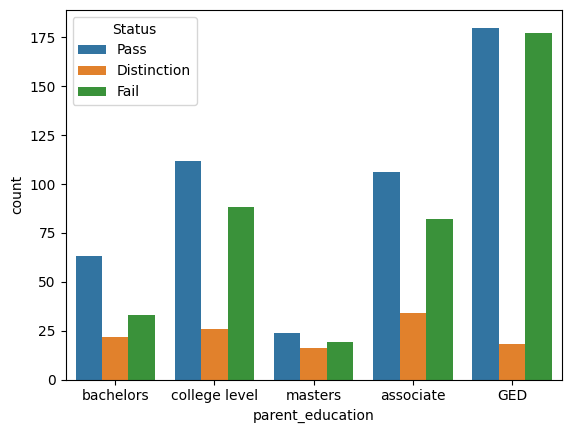

In [19]:
sns.countplot(x='parent_education',data=student_data,hue='Status')

<Axes: xlabel='lunch', ylabel='count'>

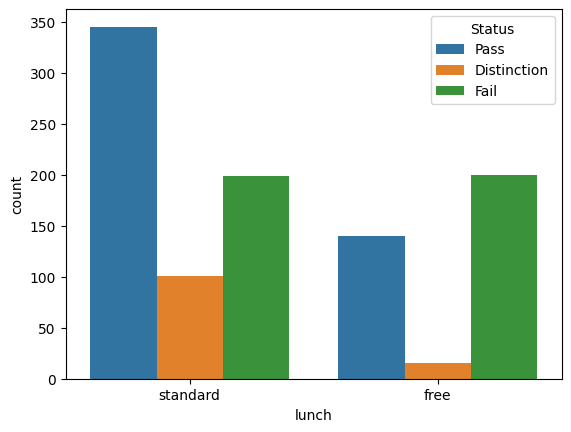

In [20]:
sns.countplot(x='lunch',data=student_data,hue='Status')

<Axes: xlabel='test_prep', ylabel='count'>

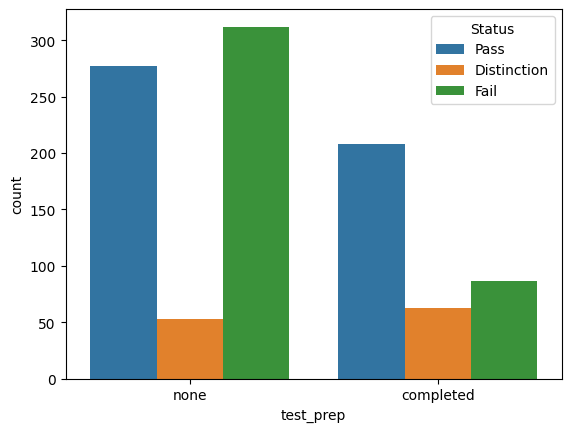

In [21]:
sns.countplot(x='test_prep',data=student_data,hue='Status')

<Axes: xlabel='ethnicity', ylabel='count'>

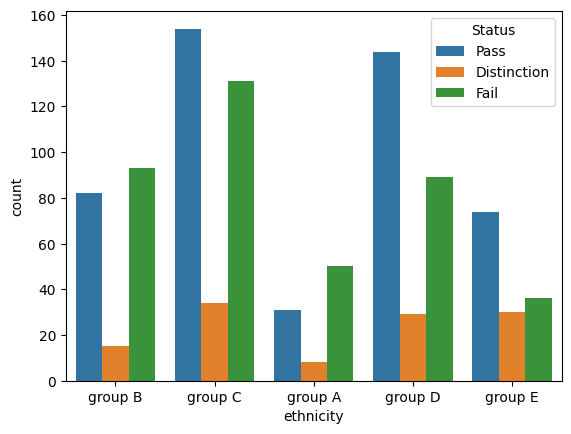

In [22]:
sns.countplot(x='ethnicity',data=student_data,hue='Status')

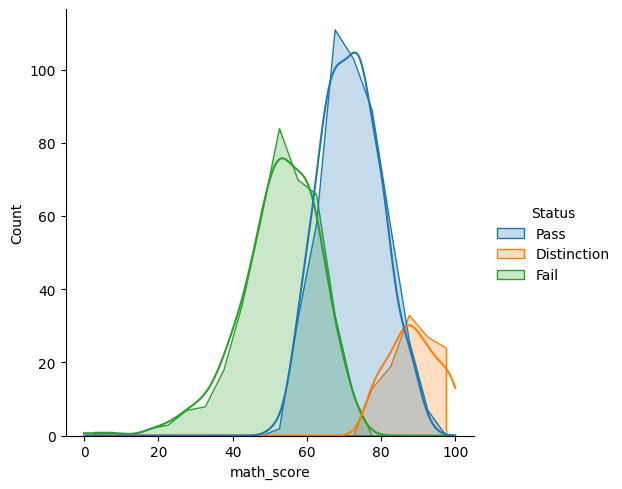

In [23]:
sns.displot(data=student_data,x='math_score', hue='Status',bins=20, kde=True,element="poly")

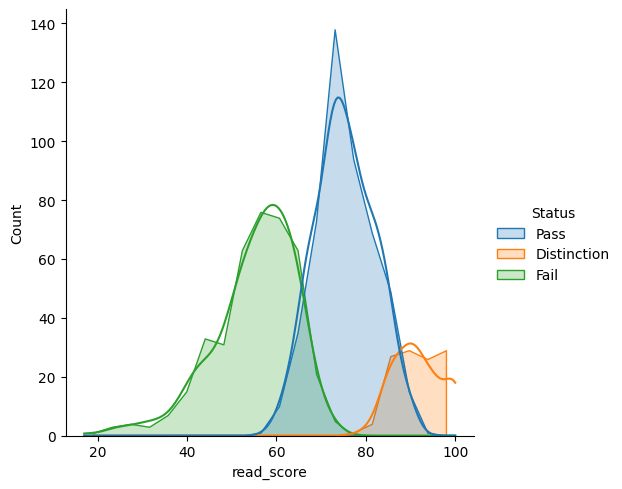

In [24]:
sns.displot(data=student_data,x='read_score', hue='Status',bins=20,kde=True,element="poly")

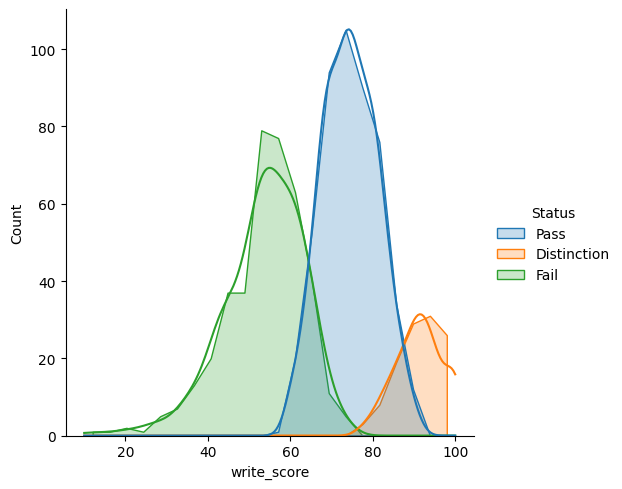

In [25]:
sns.displot(data=student_data, x="write_score", hue="Status",kde=True,element="poly")

<Axes: xlabel='percentage', ylabel='Count'>

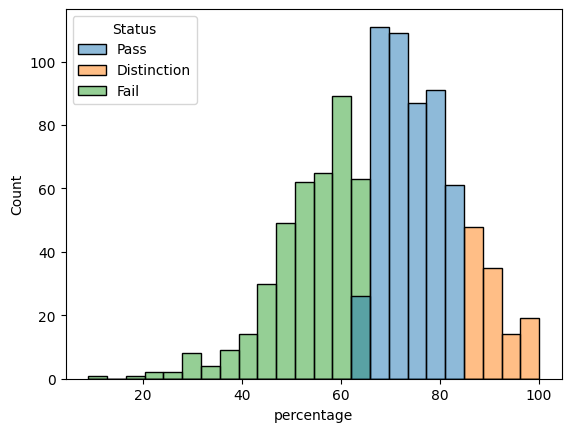

In [26]:

sns.histplot(data=student_data, x="percentage", hue="Status")

<Axes: xlabel='percentage', ylabel='math_score'>

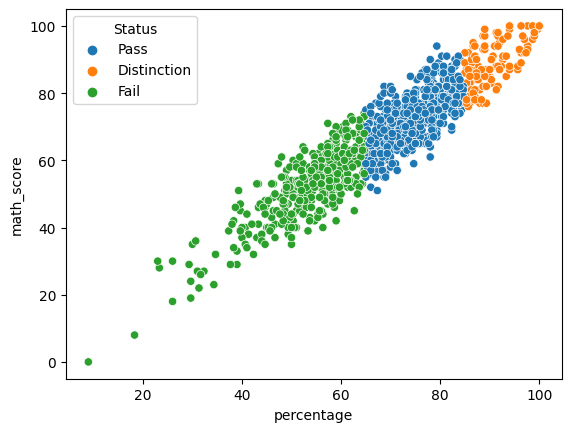

In [27]:
sns.scatterplot(data=student_data, x="percentage", y="math_score", hue="Status")

<Axes: xlabel='percentage', ylabel='read_score'>

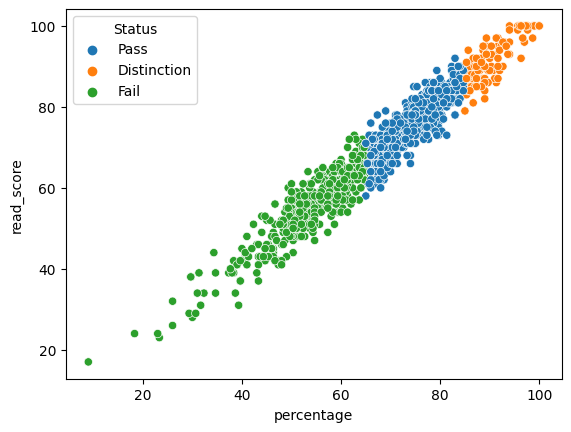

In [28]:
sns.scatterplot(data=student_data, x="percentage", y="read_score", hue="Status")

<Axes: xlabel='percentage', ylabel='write_score'>

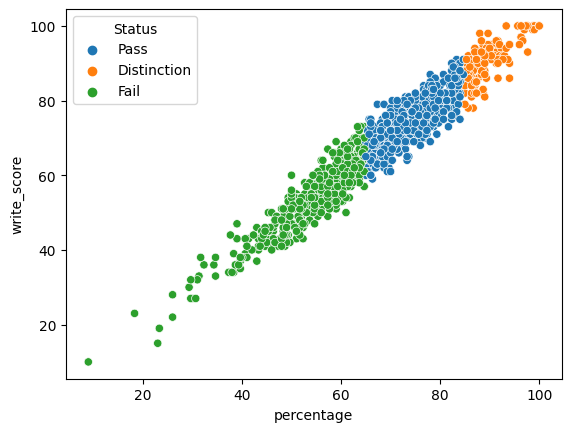

In [29]:
sns.scatterplot(data=student_data, x="percentage", y="write_score", hue="Status")

In [30]:
corr=student_data.corr()
corr.style.background_gradient(cmap ='coolwarm')

<ipython-input-30-0badc3ef0dc1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=student_data.corr()


,math_score,read_score,write_score,total_marks,percentage
math_score,1.000000,0.817580,0.802642,0.918746,0.918744
read_score,0.817580,1.000000,0.954598,0.970331,0.970331
write_score,0.802642,0.954598,1.000000,0.965667,0.965669
total_marks,0.918746,0.970331,0.965667,1.000000,1.000000
percentage,0.918744,0.970331,0.965669,1.000000,1.000000


In [31]:
classification_frame=student_data.copy()
classification_frame.head()

,gender,ethnicity,parent_education,lunch,test_prep,math_score,read_score,write_score,total_marks,percentage,Status
0,female,group B,bachelors,standard,none,72,72,74,218,72.67,Pass
1,female,group C,college level,standard,completed,69,90,88,247,82.33,Pass
2,female,group B,masters,standard,none,90,95,93,278,92.67,Distinction
3,male,group A,associate,free,none,47,57,44,148,49.33,Fail
4,male,group C,college level,standard,none,76,78,75,229,76.33,Pass


In [32]:
classification_frame['gender']=classification_frame['gender'].astype("category").cat.codes
classification_frame['ethnicity']=classification_frame['ethnicity'].astype("category").cat.codes
classification_frame['parent_education']=classification_frame['parent_education'].astype("category").cat.codes
classification_frame['lunch']=classification_frame['lunch'].astype("category").cat.codes
classification_frame['test_prep']=classification_frame['test_prep'].astype("category").cat.codes
classification_frame['Status']=classification_frame['Status'].str.replace('Distinction','Pass')
classification_frame['Status']=classification_frame['Status'].astype("category").cat.codes
classification_frame.head()

,gender,ethnicity,parent_education,lunch,test_prep,math_score,read_score,write_score,total_marks,percentage,Status
0,0,1,2,1,1,72,72,74,218,72.67,1
1,0,2,3,1,0,69,90,88,247,82.33,1
2,0,1,4,1,1,90,95,93,278,92.67,1
3,1,0,1,0,1,47,57,44,148,49.33,0
4,1,2,3,1,1,76,78,75,229,76.33,1


In [33]:
corr1=classification_frame.corr()
corr1.style.background_gradient(cmap ='coolwarm')

,gender,ethnicity,parent_education,lunch,test_prep,math_score,read_score,write_score,total_marks,percentage,Status
gender,1.000000,-0.001502,-0.043839,0.021372,-0.006028,0.167982,-0.244313,-0.301225,-0.130861,-0.130868,-0.117219
ethnicity,-0.001502,1.000000,0.103584,0.046563,-0.017508,0.216415,0.145253,0.165691,0.185168,0.185165,0.179078
parent_education,-0.043839,0.103584,1.000000,-0.017090,0.009630,0.135386,0.151427,0.196816,0.169608,0.169603,0.090717
lunch,0.021372,0.046563,-0.017090,1.000000,0.017044,0.350877,0.229560,0.245769,0.290064,0.290064,0.249035
test_prep,-0.006028,-0.017508,0.009630,0.017044,1.000000,-0.177702,-0.241780,-0.312946,-0.256710,-0.256715,-0.237864
math_score,0.167982,0.216415,0.135386,0.350877,-0.177702,1.000000,0.817580,0.802642,0.918746,0.918744,0.721887
read_score,-0.244313,0.145253,0.151427,0.229560,-0.241780,0.817580,1.000000,0.954598,0.970331,0.970331,0.779514
write_score,-0.301225,0.165691,0.196816,0.245769,-0.312946,0.802642,0.954598,1.000000,0.965667,0.965669,0.780311
total_marks,-0.130861,0.185168,0.169608,0.290064,-0.256710,0.918746,0.970331,0.965667,1.000000,1.000000,0.799225
percentage,-0.130868,0.185165,0.169603,0.290064,-0.256715,0.918744,0.970331,0.965669,1.000000,1.000000,0.799219


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

X=classification_frame[['gender','ethnicity','parent_education','lunch','test_prep','math_score']]
y=classification_frame[['Status']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
y_train

,Status
29,1
535,1
695,1
557,0
836,0
...,...
106,1
270,0
860,0
435,0


In [36]:
Logistic_reg_model=LogisticRegression()
Logistic_reg_model.fit(X_train, y_train.values.ravel())
log_y_pred = Logistic_reg_model.predict(X_test)
print("Achieved accuracy: %0.3f" %
      accuracy_score(y_test, log_y_pred))
print(classification_report(y_test, log_y_pred))

Achieved accuracy: 0.920
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        84
           1       0.92      0.94      0.93       116

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200



In [37]:
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

Param = {"subsample":[0.5, 0.75, 1],
              "learning_rate":[0.3, 0.1, 0.03],
               "n_estimators":[100,128,150]}

model = XGBClassifier(n_jobs=-1)

model_gs = GridSearchCV(model,param_grid=Param,cv=3,scoring="accuracy")

model_gs.fit(X_train, y_train.values.ravel())
boost_pred=model_gs.predict(X_test)
print(model_gs.best_estimator_)
print(model_gs.score(X_test, y_test))
print(classification_report(y_test,boost_pred))

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)
0.91
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        84
           1       0.92      0.92      0.92       116

    accuracy                           0.91       200
   macro avg       0.91